In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.options.display.max_columns = None


<ipython-input-2-214c2f57db01>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Load cost of living

In [3]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)[:-5]

In [4]:
cost_of_living_df[-8:]

,GeoFips,GeoName,LineCode,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1536,49700,"Yuba City, CA (Metropolitan Statistical Area)",1.0,RPPs: All items,97.7,98.6,98.3,98.8,98.7,99.3,98.2,97.8,97.4,97.8,97.1,97.2
1537,49700,"Yuba City, CA (Metropolitan Statistical Area)",2.0,RPPs: Goods,95.8,96.6,97.1,97.6,96.9,96.4,95.5,95.2,96.4,98.2,98.1,98.2
1538,49700,"Yuba City, CA (Metropolitan Statistical Area)",3.0,RPPs: Services: Rents,102.3,102.1,97.8,98.3,97.9,99.6,97.7,97.5,93.4,92.7,89.7,89.3
1539,49700,"Yuba City, CA (Metropolitan Statistical Area)",4.0,RPPs: Services: Other,97.6,99.3,100.2,100.8,101.3,102.8,102.0,101.5,101.6,101.2,101.6,102.2
1540,49740,"Yuma, AZ (Metropolitan Statistical Area)",1.0,RPPs: All items,93.3,94.8,94.2,95.1,93.9,94.0,92.9,92.1,90.1,88.8,88.3,87.8
1541,49740,"Yuma, AZ (Metropolitan Statistical Area)",2.0,RPPs: Goods,95.8,96.6,97.1,97.6,96.9,96.4,95.5,95.2,93.6,93.0,92.9,93.0
1542,49740,"Yuma, AZ (Metropolitan Statistical Area)",3.0,RPPs: Services: Rents,81.8,84.5,79.9,81.6,77.5,77.1,76.2,74.6,72.5,71.0,70.2,69.3
1543,49740,"Yuma, AZ (Metropolitan Statistical Area)",4.0,RPPs: Services: Other,97.6,99.3,100.2,100.8,101.3,102.7,102.0,101.5,100.0,98.7,99.0,99.2


### Load university rankings

In [5]:
university_rankings = pd.read_pickle(DATA_DIR/ 'university_ranking_statistical_area.pickle')

In [6]:
len(university_rankings)

6448

In [7]:
# remove duplicates
university_rankings['dup'] = university_rankings.UNITID.duplicated()
university_rankings = university_rankings[university_rankings.dup == False]

In [8]:
len(university_rankings)

6441

In [9]:
statistical_areas = np.array([i.split(' (')[0] for i in cost_of_living_df.GeoName.values])

In [10]:
university_rankings[university_rankings.Institution == "University of California, San Diego"]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup
21,34.0,"University of California, San Diego",USA,22.0,120,-,12,19,86.1,110680.0,University of California-San Diego,UCSD UC San Diego,9500 Gilman Dr,La Jolla,CA,92093,6.0,8.0,Pradeep Khosla,Chancellor,8585342230,956006144.0,804355790,131700.0,1.0,www.ucsd.edu/,admissions.ucsd.edu/index.html,fas.ucsd.edu/,admission.universityofcalifornia.edu/apply-now...,fas.ucsd.edu/forms-and-resources/financial-aid...,students.ucsd.edu/sponsor/veterans/index.html,ncaa.org/about/resources/research/graduation-r...,disabilities.ucsd.edu/,1.0,1.0,1.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,11.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,14.0,15.0,4.0,16.0,15.0,15.0,15.0,1.0,5.0,1.0,University of California,106080.0,41740,1,-2,-2.0,6073,San Diego County,649.0,-117.235866,32.877749,93.0,2.0,-117.235866,"San Diego-Chula Vista-Carlsbad, CA",False


### add RPP values to each university

In [11]:
RPP_list = [
    ['RPP_all','RPPs: All items'],
]

In [12]:
# Hardcoded - the US nonmetropolitan RPP for all items in 2019 is 86.6
NONMETROPOLITAN_RPP_ALL = 86.6

In [13]:
for label, col in tqdm(RPP_list):
    RPP = []
    for idx, row in tqdm(university_rankings.iterrows(), total=len(university_rankings)):
        matching_stat_area = cost_of_living_df[cost_of_living_df.GeoFips.astype(int) == row.CBSA]
        
        if len(matching_stat_area) == 0:
            COL_value = NONMETROPOLITAN_RPP_ALL
                
        else:
            COL_value = matching_stat_area[matching_stat_area.Description == col]['2019'].values[0]
        RPP.append(COL_value)
    university_rankings[label] = RPP

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6441 [00:00<?, ?it/s]

### Save university rankings with RPP values

In [14]:
university_rankings[:3]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup,RPP_all
0,1.0,Harvard University,USA,1.0,1,1,1,1,100.0,166027.0,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25.0,1.0,Lawrence S. Bacow,President,6174951000,42103580.0,082359691|149617367|047006379,215500.0,1.0,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,5.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2505.0,-71.118313,42.374471,96.0,1.0,-71.118313,"Boston-Cambridge-Newton, MA-NH",False,115.5
1,2.0,Massachusetts Institute of Technology,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",False,115.5
2,3.0,Stanford University,USA,3.0,10,4,3,2,95.1,243744.0,Stanford University,,,Stanford,CA,94305,6.0,8.0,Marc Tessier-Lavigne,President,6507232300,941156365.0,009214214,130500.0,1.0,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,21.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,41940,1,488,-2.0,6085,Santa Clara County,618.0,-122.167359,37.429434,96.0,1.0,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",False,126.7


In [15]:
university_rankings[university_rankings.Institution == "Dartmouth College"]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup,RPP_all
27,40.0,Dartmouth College,USA,25.0,53,17,95,273,85.5,182670.0,Dartmouth College,"Dartmouth, Big Green",207 Parkhurst Hall,Hanover,NH,03755-3529,33.0,1.0,Philip J. Hanlon '77,President,6036461110,20222111.0,041027822,257300.0,1.0,www.dartmouth.edu/,admissions.dartmouth.edu/,admissions.dartmouth.edu/afford/apply-financia...,admissions.dartmouth.edu/apply/apply-dartmouth,admissions.dartmouth.edu/afford/estimate-your-...,financialaid.dartmouth.edu/apply-aid/veteran-s...,www.dartmouthsports.com/,www.dartmouth.edu/~accessibility/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,33.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,7.0,17.0,14.0,5.0,14.0,16.0,15.0,16.0,2.0,3.0,2.0,-2,-2.0,30100,2,-2,74350.0,33009,Grafton County,3302.0,-72.289949,43.704115,96.0,1.0,-72.289949,"Lebanon, NH-VT",False,86.6


In [16]:
university_rankings.to_pickle(DATA_DIR/ 'university_ranking_rpp.pickle')

In [17]:
university_rankings = university_rankings[university_rankings.RPP_all.isnull() ==False]

In [18]:
university_rankings = university_rankings.sort_values(by='National Rank')

In [19]:
from scipy.stats import pearsonr

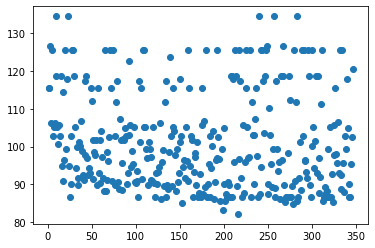

In [20]:
x = university_rankings["National Rank"].values
y = university_rankings['RPP_all']
fig, ax = plt.subplots()
ax.scatter(
    x,
    y
)
#plt.plot(smoothed)
#ax.set_yscale('log')

In [21]:
import seaborn as sns

(0.0, 50.0)

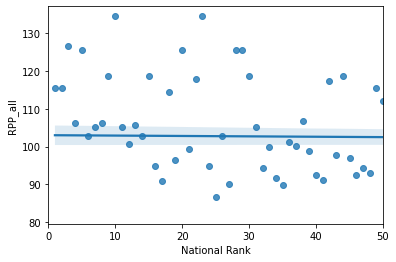

In [22]:
fig, ax = plt.subplots()
sns.regplot(x = 'National Rank', y="RPP_all", data=university_rankings, ax = ax)# logx=True, #
ax.set_xlim([0,50])

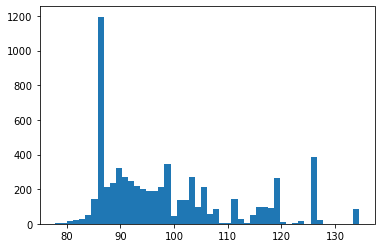

In [23]:
plt.hist(university_rankings['RPP_all'].values, bins=50);